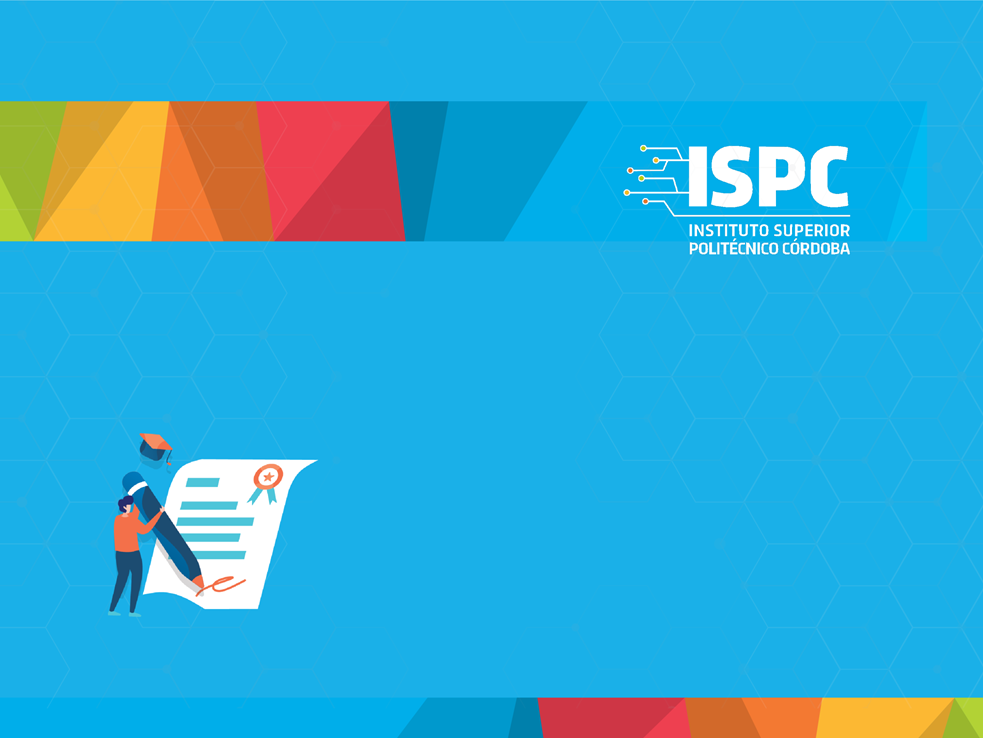

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





Viviana Farabollini

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import datasets

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


Sobre el dataset 'wine' de sklearn-datasets, se genera un dataframe en pandas con 4 variables para estimar la cantidad de 'alcohol' en los vinos en base a 'color_intensity', 'total_phenols' y 'proline'.
De acuerdo al código presentado se trata de resolver el problema usando Regresión Lineal Múltiple. Por los gráficos parecería que existe una distribución normal en los residuos y que además la desviación en los mismos no es alta. Por otro lado, se descartan problemas de multicolinealidad, por la matriz de correlación con coeficientes menores a 0,7.

Si se utiliza Regresión Lineal Simple, cruzando las variables 'alcohol' y 'proline', el valor del coeficiente de correlación indica un ajuste de 41,1% que no es óptimo pero tampoco es muy malo considerando que se utiliza una sola variable

In [2]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI

datos = datasets.load_wine()

In [3]:
# Creamos un dataframe con los datos

df_vinos= pd.DataFrame(datos.data, columns=datos.feature_names)

In [4]:
df_vinos.shape

(178, 13)

In [5]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
#Generamos un dataframe con 4 predictore
vinos =pd.DataFrame({'alcohol': df_vinos['alcohol'], 'color_intensity': df_vinos['color_intensity'], 'total_phenols':df_vinos['total_phenols'], 'proline': df_vinos['proline']})
vinos

,alcohol,color_intensity,total_phenols,proline
0,14.23,5.64,2.80,1065.0
1,13.20,4.38,2.65,1050.0
2,13.16,5.68,2.80,1185.0
3,14.37,7.80,3.85,1480.0
4,13.24,4.32,2.80,735.0
...,...,...,...,...
173,13.71,7.70,1.68,740.0
174,13.40,7.30,1.80,750.0
175,13.27,10.20,1.59,835.0
176,13.17,9.30,1.65,840.0


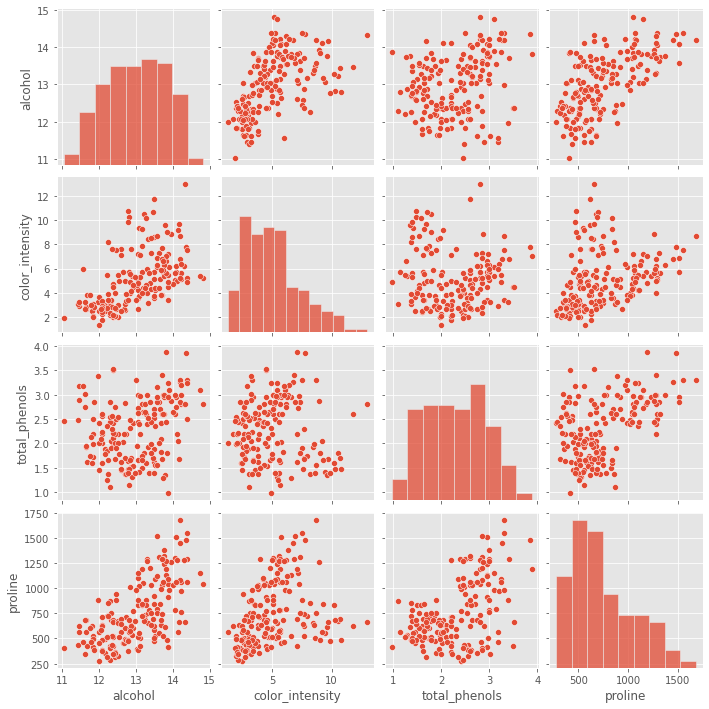

In [7]:
#Trazarmos relaciones por pares en un conjunto de datos.

"""De forma predeterminada, esta función creará una cuadrícula de ejes 
de modo que cada variable numérica datase comparta en los ejes y en una sola fila y 
los ejes x en una sola columna. 
Las gráficas diagonales se tratan de manera diferente: se dibuja una gráfica de distribución univariada 
para mostrar la distribución marginal de los datos en cada columna."""

v=sns.pairplot(vinos, vars= ['alcohol', 'color_intensity', 'total_phenols', 'proline'])

v

In [8]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['alcohol','proline','r']
    corr_mat = corr_mat.loc[corr_mat['alcohol'] != corr_mat['proline'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = vinos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,alcohol,proline,r,abs_r
3,alcohol,proline,0.643720,0.643720
12,proline,alcohol,0.643720,0.643720
1,alcohol,color_intensity,0.546364,0.546364
4,color_intensity,alcohol,0.546364,0.546364
11,total_phenols,proline,0.498115,0.498115
14,proline,total_phenols,0.498115,0.498115
7,color_intensity,proline,0.316100,0.316100
13,proline,color_intensity,0.316100,0.316100
2,alcohol,total_phenols,0.289101,0.289101
8,total_phenols,alcohol,0.289101,0.289101


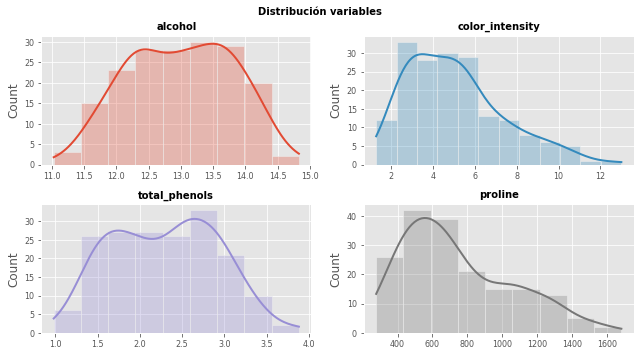

In [9]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = vinos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = vinos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 10, fontweight = "bold");

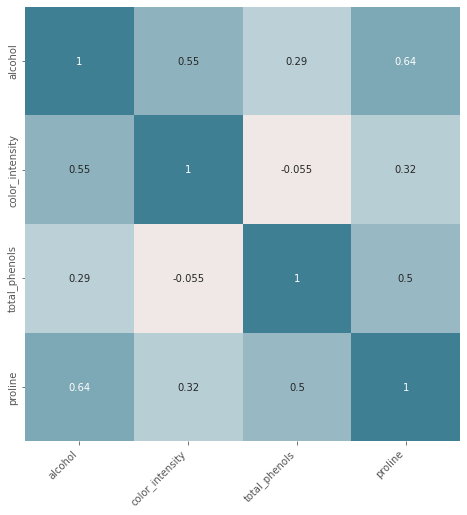

In [10]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)


ax.tick_params(labelsize = 10)

In [16]:
! pip install statsmodels


     ---------------------------------------- 9.2/9.2 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 40.8/40.8 KB 391.2 kB/s eta 0:00:00
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


You should consider upgrading via the 'C:\Users\adiav\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
# División de los datos en train y test
# ==============================================================================
X = vinos[['color_intensity', 'total_phenols', 'proline',]]
y = vinos['alcohol']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [19]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
datos_train = pd.DataFrame(
                   np.hstack((X_train, y_train)),
                    columns=['color_intensity', 'total_phenols', 'proline','alcohol']
              )
modelo = smf.ols(formula = 'alcohol ~ color_intensity + total_phenols + proline', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     56.94
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.14e-24
Time:                        17:19:01   Log-Likelihood:                -115.96
No. Observations:                 142   AIC:                             239.9
Df Residuals:                     138   BIC:                             251.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.0483      0.208     

In [20]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     56.94
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.14e-24
Time:                        17:19:06   Log-Likelihood:                -115.96
No. Observations:                 142   AIC:                             239.9
Df Residuals:                     138   BIC:                             251.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0483      0.208     

In [21]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna alcohol del conjunto de train y test
X_train = X_train.drop(columns = 'proline')
X_test  = X_test.drop(columns = 'proline')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     51.49
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.85e-17
Time:                        17:19:12   Log-Likelihood:                -133.79
No. Observations:                 142   AIC:                             273.6
Df Residuals:                     139   BIC:                             282.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.9153      0.234     

In [22]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,10.451999,11.378510
color_intensity,0.148929,0.238403
total_phenols,0.312672,0.646587


In [23]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

Text(0.5, 0.98, 'Diagnóstico residuos')

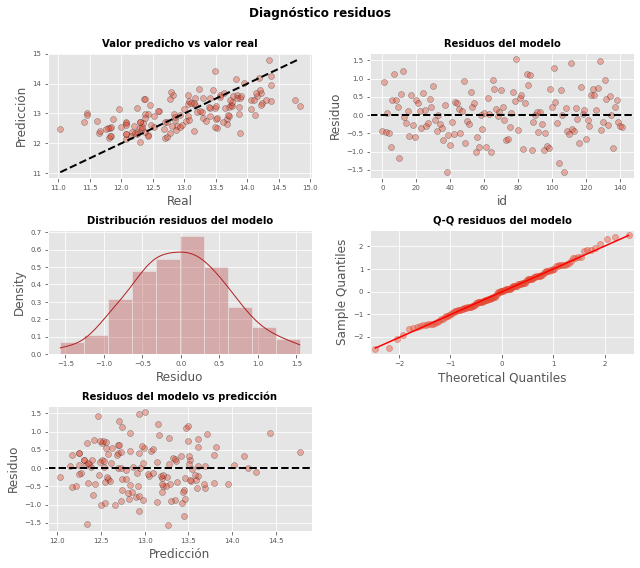

In [24]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

Regresión Lineal Simple

In [25]:
reg = LinearRegression()

In [26]:
X1 = vinos[['proline']] #variable independiente
y1= vinos['alcohol']  #variable dependiente

In [27]:
reg.fit(X1, y1)

LinearRegression()

In [28]:
modelo_prediccion = reg.predict(X1)

In [29]:
from sklearn import metrics

In [30]:
metrics.r2_score(y1, modelo_prediccion)

0.4143754862647204